# AN ANALYSIS OF MY LINKEDIN CONNECTIONSS, THE COMPANIES THEY WORK AT AND THE POSITIONS THEY HOLD

## By: Urias, Triumph

### Importing Libraries

In [1]:
# Install libraries

from multiprocessing.spawn import import_main_path
import pandas as pd
import janitor
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

import os

### Data Loading

In [2]:
pwd = os.getcwd()

df_ori = pd.read_csv(pwd +"/DataSet/Connections.csv", skiprows = 2)

df = df_ori.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     714 non-null    object
 1   Last Name      714 non-null    object
 2   Email Address  17 non-null     object
 3   Company        674 non-null    object
 4   Position       675 non-null    object
 5   Connected On   723 non-null    object
dtypes: object(6)
memory usage: 34.0+ KB


In [3]:
def missing_values(df):

    missing_values_count = 0
    columns_count = 0 

    for col in df.columns:

        if df[col].isnull().any():
            columns_count += 1
            missing_values_count += df[col].isnull().sum()
            print(f"{col} has a total of {missing_values_count} missing values.")
        missing_values_count = 0
    
    print(" ")
    if columns_count != 0:
        print(f"Of your {df.shape[1]} columns, you have a total of {columns_count} columns with missing values.")

missing_values(df)       

First Name has a total of 9 missing values.
Last Name has a total of 9 missing values.
Email Address has a total of 706 missing values.
Company has a total of 49 missing values.
Position has a total of 48 missing values.
 
Of your 6 columns, you have a total of 5 columns with missing values.


In [4]:
def perce_missing_vals(df):

    for col in df.columns:

        if df[col].isnull().any():
            pct = (df[col].isnull().sum() / len(df[col]) * 100).round(2)
            print(f"{col} has {pct}% of its values missing.")

perce_missing_vals(df)

First Name has 1.24% of its values missing.
Last Name has 1.24% of its values missing.
Email Address has 97.65% of its values missing.
Company has 6.78% of its values missing.
Position has 6.64% of its values missing.


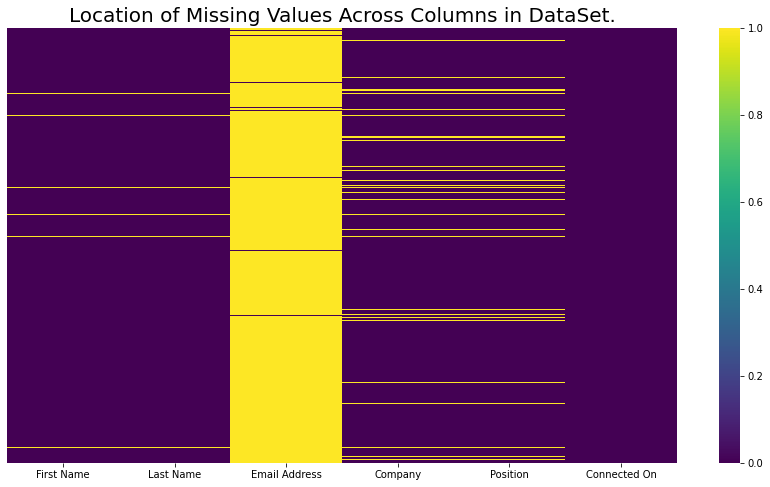

In [5]:
plt.figure(figsize=[15, 8])

plt.title("Location of Missing Values Across Columns in DataSet.", fontsize = 20)

sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis', cbar=True);

**Insight 1:** 9 of my connections have no names. This is strange. 

**Insight 2:** A good majority of my connections didn't include their email addresses on their profile. Not encouraged.

**Question:** How could there be connections with no names? Could those represent deleted accouunts?

### Data Cleaning

In [6]:
# Drop name columns for ethical reasons.

# Drop email address column because it has too many null values and is not necessary for this project

df=(
    df
    .clean_names()
    .drop(columns= ["first_name", "last_name", "email_address"])
    .dropna(subset = ["company", "position"]) # Drop rows where company and/ or position had missing values. 
    .to_datetime("connected_on", format = "%d %b %Y") # Convert connected_on column to datetime datatype.
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 722
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company       674 non-null    object        
 1   position      674 non-null    object        
 2   connected_on  674 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 21.1+ KB


**In the end, I'm working with only 674 of my connections.**

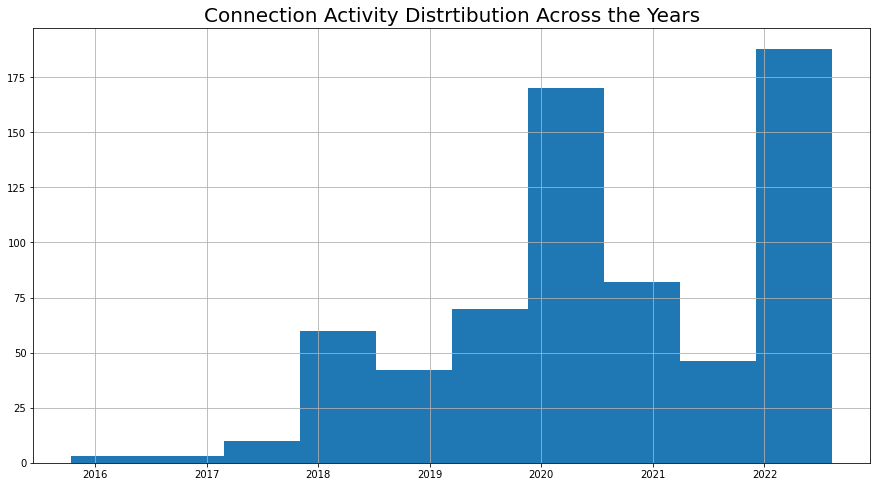

In [7]:
plt.figure(figsize = [15, 8])

plt.title("Connection Activity Distrtibution Across the Years", fontsize = 20)

df["connected_on"].hist();

**Insight 3:** I joined LinkedIn in 2015. This was first year in Covenant University. I believe it had something to do with the inspirational people I met in the Technical Crew service Unit.

**Insight 4:** First spike of connection activity in 2018. This should be because I was trying to get an internship ooportunity around that time.

**Insight 5:** Second spike of connection activity in 2020. Convocation and job search.

**Insight 6:** Third spike of connection activity, 2022. Job search and connection to learn more and add value to myself and those I connect with.


### Exploratory Data Analysis

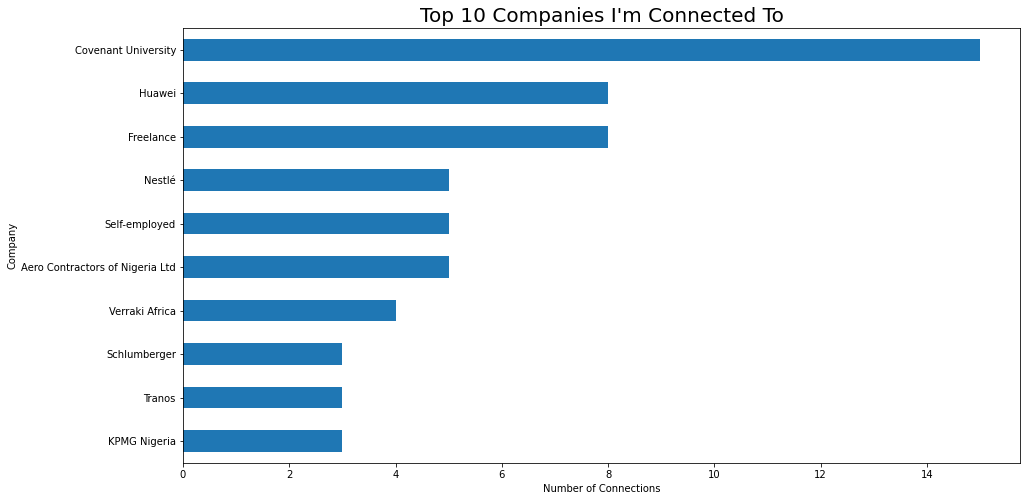

In [8]:
# Simple EDA

plt.figure(figsize = [15, 8])

df["company"].value_counts(ascending = False).head(10).plot(
    kind = "barh"
).invert_yaxis();
plt.title("Top 10 Companies I'm Connected To", fontsize = 20)
plt.xlabel("Number of Connections")
plt.ylabel("Company");

**Insight 7:** Most of my connections are from Covenant University. Makes sense as I spent 5 years of my life interacting wth these people and that community was a major force for my joining and being active on LinkedIn.

In [9]:
#Remove freelancers and self-employed connections.

pattern = "freelance|self-employed"

df=df[~df["company"].str.contains(pattern, case = False)]

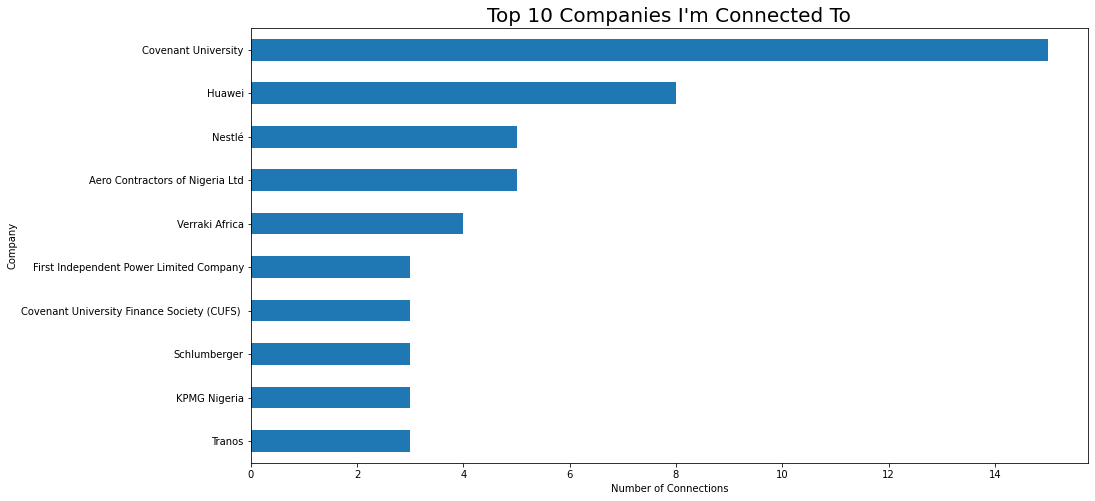

In [18]:

plt.figure(figsize = (15, 8))

df["company"].value_counts(ascending = False).head(10).plot(
    kind = "barh"
).invert_yaxis();
plt.title("Top 10 Companies I'm Connected To", fontsize = 20)
plt.xlabel("Number of Connections")
plt.ylabel("Company");

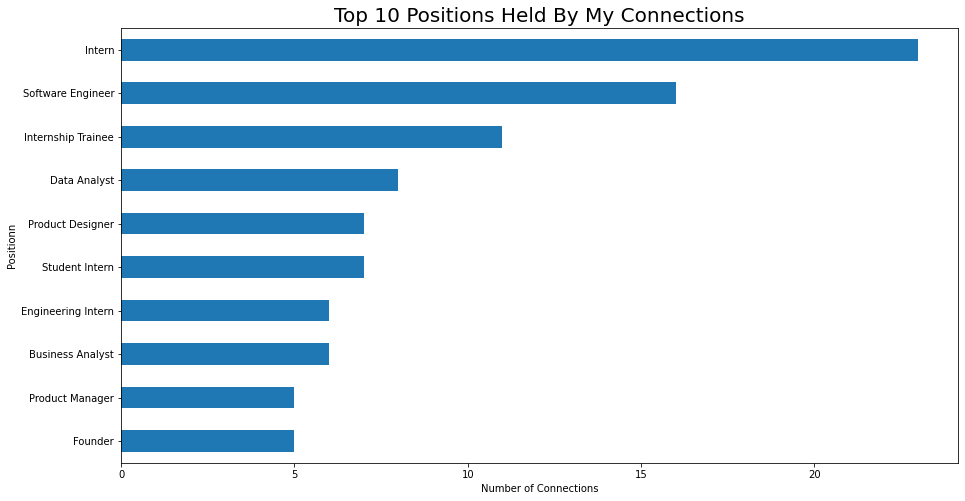

In [19]:

plt.figure(figsize = (15, 8))

df["position"].value_counts(ascending = False).head(10).plot(
    kind = "barh"
).invert_yaxis();
plt.title("Top 10 Positions Held By My Connections", fontsize = 20)
plt.xlabel("Number of Connections")
plt.ylabel("Positionn");

**Insight 8:** Most of my connections are interns. I should work on that.

## Visualize Company Connections

In [12]:
# Aggregate the company column

df_company = df["company"].value_counts(ascending = False).reset_index()
df_company.columns = ["company", "count"]
df_company

,company,count
0,Covenant University,15
1,Huawei,8
2,Nestlé,5
3,Aero Contractors of Nigeria Ltd,5
4,Verraki Africa,4
...,...,...
570,Goldenville Schools,1
571,SRAT,1
572,Quick Leap,1
573,Mozilla,1


In [13]:
# Focus on companies with more than two counts.

df_company_reduced = df_company.loc[df_company['count'] >= 2]
df_company_reduced.shape

(51, 2)

In [14]:
g = nx.Graph()
g.add_node("Me")

for _, row in df_company_reduced.iterrows():

    company = row["company"]
    count = row["count"]

    title = f" From, {company} you have {count} connections. These are their positions: \n"
    positions = set([x for x in df[company == df["company"]]["position"]])
    positions = ' \n'.join("{}".format(x) for x in positions)

    position_list = f"{positions}"
    hover_info = title + position_list

    g.add_node(company, size = count*2, title = hover_info, color = "#3449eb")
    g.add_edge("Me", company, color = "grey")

nt = net.Network(height = "700px", width = "1000px", bgcolor = "black", font_color = "white")
nt.from_nx(g)
nt.hrepulsion()

nt.show("connections_company_graph.html")
display(HTML("connections_company_graph.html"))


## Visualize Positions Held by Connections

In [15]:
# Aggregate position column.

df_position = df["position"].value_counts(ascending = False).reset_index()
df_position.columns = ["position", "count"]
df_position

,position,count
0,Intern,23
1,Software Engineer,16
2,Internship Trainee,11
3,Data Analyst,8
4,Product Designer,7
...,...,...
489,Robotics Engineer,1
490,Graduate Teaching Assistant,1
491,Postgraduate Student,1
492,"Head Of Department, Mechanical Engineering",1


In [16]:
# Focus on positions with more than two counts.

df_position_reduced = df_position.loc[df_company['count'] >= 2]
df_position_reduced.shape

(51, 2)

In [17]:
g = nx.Graph()
g.add_node("Me")

for _, row in df_position_reduced.iterrows():

    position = row["position"]
    count = row["count"]

    title = f" You arte connected to {count} people working as {position} in these companies: \n"
    companies = set([x for x in df[position == df["position"]]["company"]])
    companies = ' \n'.join("{}".format(x) for x in companies)

    companies_list = f"{companies}"
    hover_info = title + companies_list

    g.add_node(position, size = count*2, title = hover_info, color = "#3449eb")
    g.add_edge("Me", position, color = "grey")

nt = net.Network(height = "700px", width = "1000px", bgcolor = "black", font_color = "white")
nt.from_nx(g)
nt.hrepulsion()

nt.show("connections_position_graph.html")
display(HTML("connections_postion_graph.html"))
